Random Seeding & Enable Determinism to produce replicable results

In [119]:
import tensorflow as tf
from tensorflow import keras

tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

Importing libraries and modules

In [120]:
import numpy as np
import pandas as pd
import openpyxl
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical

print(tf.__version__) 
# tf.random.set_seed(123)

from tensorboard.plugins.hparams import api as hp

2.15.0


In [121]:
features = ["Neck_flexion", "Neck_left-ward_tilt", "Neck_right-ward_rotation", "LeftElbow_flexion", "LeftElbow_abduction", "RightElbow_flexion", "RightElbow_abduction", "LeftKnee_flexion", "RightKnee_flexion", "Thorax_extension"]

Load Dataset

In [122]:
filename = "mocap dataset.csv"
filepath = f"/home/RUS_CIP/st179677/project/dataset/5 users/{filename}"

df = pd.read_csv(filepath)
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)



df = df[features]
df

,Neck_flexion,Neck_left-ward_tilt,Neck_right-ward_rotation,LeftElbow_flexion,LeftElbow_abduction,RightElbow_flexion,RightElbow_abduction,LeftKnee_flexion,RightKnee_flexion,Thorax_extension
0,6.532609,3.413257,-9.364980,2.198468,0.710080,6.993781,-2.687741,-20.284060,0.000000,3.393499
1,6.557388,3.534179,-9.039681,1.893722,1.116879,5.846905,-2.109600,-20.223180,-0.048457,3.442418
2,6.557417,3.569129,-8.875886,1.806886,1.213301,5.292946,-1.873890,-20.183570,0.000000,3.458419
3,6.584455,3.591450,-8.561050,1.691654,1.302401,4.553975,-1.617327,-20.087540,-0.068528,3.467804
4,6.645496,3.591949,-8.246242,1.641156,1.276125,3.538838,-1.371222,-19.995180,0.000000,3.469554
...,...,...,...,...,...,...,...,...,...,...
50744,-16.670490,0.316716,-5.353024,15.269830,-15.191440,6.520080,-5.493917,0.000000,-17.106140,6.845329
50745,-14.910760,0.640351,-6.052200,14.761030,-15.632160,6.830098,-5.919752,-0.044235,-16.247700,6.842291
50746,-14.163410,0.802677,-6.308852,14.491450,-15.728180,6.867785,-6.101278,-0.044235,-15.807290,6.873380
50747,-12.880330,1.093821,-6.555832,13.773880,-15.554540,6.764049,-6.280038,0.000000,-14.789060,6.955138


In [123]:
# scaler = MinMaxScaler(feature_range=(-1,1))

# scaler.fit(df)

# df = scaler.transform(df)
# df

Plotting Distribution of Classes

In [124]:
labels_filename = "labels.xlsx"
labels_filepath = f"/home/RUS_CIP/st179677/project/dataset/5 users/{labels_filename}"
labels_df = pd.read_excel(labels_filepath)
print(labels_df)

# label_counts = labels_df.value_counts()

# labels = ["standing", "lifting", "carrying", "keeping", "unnatural"]

# # Sort the labels for better visualization
# label_counts = label_counts.sort_index()

# # Plot the distribution
# plt.figure(figsize=(8, 6))
# label_counts.plot(kind='bar', color='skyblue')
# plt.xticks(range(len(labels)))
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.xlabel('Class Labels')
# plt.ylabel('Frequency')
# plt.title('Distribution of Class Labels')
# plt.show()

       labels
0           0
1           0
2           0
3           0
4           0
...       ...
50744       4
50745       4
50746       4
50747       4
50748       4

[50749 rows x 1 columns]


In [125]:
# # Create 51 empty lists with names X0 to X50
# X0, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28, X29, X30, X31, X32, X33, X34, X35, X36, X37, X38, X39, X40, X41, X42, X43, X44, X45, X46, X47, X48, X49, X50, y = ([] for _ in range(52))
# # X, y = [[] for _ in range(51)], []

# # # Print the lists for verification
# # for i, X_list in enumerate([X0, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28, X29, X30, X31, X32, X33, X34, X35, X36, X37, X38, X39, X40, X41, X42, X43, X44, X45, X46, X47, X48, X49, X50, y]):
# #     print(f"{X_list=}")


In [126]:
# Create 51 empty lists with names X0 to X50
X0, X1, X2, X3, X4, X5, X6, X7, X8, X9, y = ([] for _ in range(11))
# X, y = [[] for _ in range(51)], []

# # Print the lists for verification
# for i, X_list in enumerate([X0, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28, X29, X30, X31, X32, X33, X34, X35, X36, X37, X38, X39, X40, X41, X42, X43, X44, X45, X46, X47, X48, X49, X50, y]):
#     print(f"{X_list=}")


Create Sequences from Dataset

In [127]:
timesteps = 300

# Iterate over the range of rows in df
for i in range(0, df.shape[0] - timesteps):
    for j in range(10):  # Loop for column indexing
        globals()[f'X{j}'].append(df.iloc[i:i + timesteps, j])

# Iterate over the range of rows in labels_df
for i in range(0, labels_df.shape[0] - timesteps):
     y.append(labels_df.iloc[i + timesteps, 0])


In [128]:
type(y)

list

In [129]:
y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [130]:
# X0, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28, X29, X30, X31, X32, X33, X34, X35, X36, X37, X38, X39, X40, X41, X42, X43, X44, X45, X46, X47, X48, X49, X50, y = np.array(X0),  np.array(X1),  np.array(X2),  np.array(X3),  np.array(X4),  np.array(X5),  np.array(X6),  np.array(X7),  np.array(X8),  np.array(X9),  np.array(X10), np.array(X11) , np.array(X12) , np.array(X13) , np.array(X14) , np.array(X15) , np.array(X16) , np.array(X17) , np.array(X18) , np.array(X19) , np.array(X20) , np.array(X21) , np.array(X22) , np.array(X23) , np.array(X24) , np.array(X25) , np.array(X26) , np.array(X27) , np.array(X28) , np.array(X29) , np.array(X30) , np.array(X31) , np.array(X32) , np.array(X33) , np.array(X34) , np.array(X35) , np.array(X36) , np.array(X37) , np.array(X38) , np.array(X39) , np.array(X40) , np.array(X41) , np.array(X42) , np.array(X43) , np.array(X44) , np.array(X45) , np.array(X46) , np.array(X47) , np.array(X48) , np.array(X49) , np.array(X50) , np.array(y)

In [131]:
X0, X1, X2, X3, X4, X5, X6, X7, X8, X9, y = np.array(X0), np.array(X1),  np.array(X2),  np.array(X3),  np.array(X4),  np.array(X5),  np.array(X6),  np.array(X7),  np.array(X8),  np.array(X9), np.array(y)

In [132]:
# X0.shape

In [133]:
X0.shape

(50449, 300)

In [134]:
X0

array([[  6.532609,   6.557388,   6.557417, ..., -10.80802 , -11.27777 ,
        -12.26072 ],
       [  6.557388,   6.557417,   6.584455, ..., -11.27777 , -12.26072 ,
        -13.2373  ],
       [  6.557417,   6.584455,   6.645496, ..., -12.26072 , -13.2373  ,
        -14.02953 ],
       ...,
       [  5.147307,   5.093776,   4.986763, ..., -18.60934 , -16.67049 ,
        -14.91076 ],
       [  5.093776,   4.986763,   4.934235, ..., -16.67049 , -14.91076 ,
        -14.16341 ],
       [  4.986763,   4.934235,   4.819223, ..., -14.91076 , -14.16341 ,
        -12.88033 ]])

In [135]:
# X = np.stack([X0, X1, X2, X3, X4, X5, X6,  X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28, X29, X30, X31, X32, X33, X34, X35, X36, X37, X38, X39, X40, X41, X42, X43, X44, X45, X46, X47, X48, X49, X50 ], axis=2)

In [136]:
X = np.stack([X0, X1, X2, X3, X4, X5, X6, X7, X8, X9], axis=2)

In [137]:
# scaler = MinMaxScaler(feature_range=(0,1))

# scaler.fit(df)

# df = scaler.transform(df)
# df

In [138]:
X.shape

(50449, 300, 10)

In [139]:
y.shape

(50449,)

In [140]:
# convert labels to one hot encoded

encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

# encode integers to one hot encoded values
Y = to_categorical(encoded_Y)
print(Y)
print(Y.shape)

[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]
(50449, 5)


In [141]:
#splitting dataset into train, test and validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=2)

print("X train :",X_train.shape)
print("y train:", y_train.shape)
print("X test :", X_test.shape)
print("y test :" ,y_test.shape)
print("X val :" ,X_val.shape)
print("y val :" ,y_val.shape)

# print(X_train)
# print(X_test)
# print(y_train) 
# print(y_val)



X train : (36323, 300, 10)
y train: (36323, 5)
X test : (10090, 300, 10)
y test : (10090, 5)
X val : (4036, 300, 10)
y val : (4036, 5)


In [142]:
from tensorflow.keras.optimizers import Adam

def model_builder(hp):
    model = tf.keras.Sequential()

    hp_lstm_neurons = hp.Int('LSTM_layer', min_value=32, max_value=64, step=32)
    hp_dense_neurons_l1 = hp.Int('Dense_layer_1', min_value=10, max_value=20, step=5)
    hp_dense_neurons_l2 = hp.Int('Dense_layer_2', min_value=10, max_value=20, step=5)
    hp_dropout = hp.Choice('dropout', values=[0.0,0.1])
    hp_lr = hp.Choice('learning_rate', values=[1e-2,1e-3,1e-4])

    model.add(LSTM(hp_lstm_neurons, input_shape=(100,10), dropout=hp_dropout))
    model.add(Dense(hp_dense_neurons_l1, activation='relu'))
    model.add(Dense(hp_dense_neurons_l2, activation='relu'))
    model.add(Dense(5, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=hp_lr),loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [143]:
import keras_tuner as kt

tuner = kt.GridSearch(model_builder,
                     objective='val_accuracy',
                     seed=1,
                     max_retries_per_trial=3,
                     max_consecutive_failed_trials=5)
                     

In [144]:
# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)

In [145]:
# tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val) , callbacks=[early_stopping])

In [146]:
# best_hps = tuner.get_best_hyperparameters()[0]
# print(best_hps.values)

In [147]:
# model = tuner.hypermodel.build(best_hps)
# history = model.fit(X_train, y_train, epochs=60, validation_data=[X_val, y_val],callbacks=[early_stopping])

In [148]:
#LSTM Model

model = Sequential()
model.add(LSTM(16, input_shape=(300,10), dropout=0.1))
model.add(Dense(15, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(5, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 16)                1728      
                                                                 
 dense_9 (Dense)             (None, 15)                255       
                                                                 
 dense_10 (Dense)            (None, 20)                320       
                                                                 
 dense_11 (Dense)            (None, 5)                 105       
                                                                 
Total params: 2408 (9.41 KB)
Trainable params: 2408 (9.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


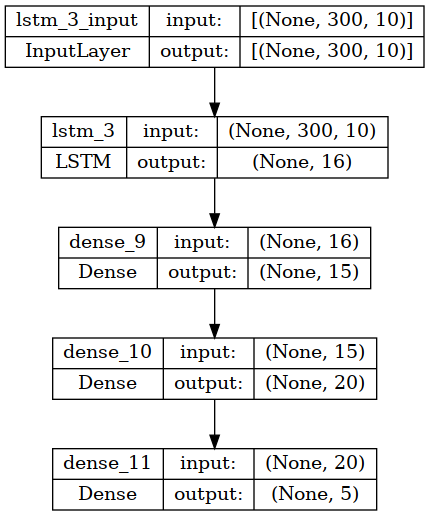

In [149]:
from keras.utils import plot_model
plot_model(model,show_shapes= True, show_layer_names= True, to_file='/home/RUS_CIP/st179677/project/LSTM.png')

In [150]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
filepath_1 = '/home/RUS_CIP/st179677/project/model/models/best_model.h5'
checkpoint = ModelCheckpoint(filepath=filepath_1, 
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)

callbacks_list = [early_stopping] # tf.keras.callbacks.TensorBoard(logdir), hp.KerasCallback(logdir, hparams)]

In [151]:
#LSTM model
from keras.optimizers import Adam

adam = Adam(learning_rate=0.001)
# chk = ModelCheckpoint('best_model.pkl', monitor='val_acc', save_best_only=True, mode='max', verbose=1)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history=model.fit(X_train, y_train ,validation_data=([X_val], y_val), epochs=60, callbacks=callbacks_list, batch_size=48)

Epoch 1/60
757/757 [==============================] - 7s 8ms/step - loss: 0.5834 - accuracy: 0.7921 - val_loss: 0.3152 - val_accuracy: 0.8865
Epoch 2/60
757/757 [==============================] - 6s 7ms/step - loss: 0.2169 - accuracy: 0.9269 - val_loss: 0.2221 - val_accuracy: 0.9242
Epoch 3/60
757/757 [==============================] - 6s 7ms/step - loss: 0.1510 - accuracy: 0.9500 - val_loss: 0.2113 - val_accuracy: 0.9311
Epoch 4/60
757/757 [==============================] - 6s 8ms/step - loss: 0.1092 - accuracy: 0.9655 - val_loss: 0.1379 - val_accuracy: 0.9542
Epoch 5/60
757/757 [==============================] - 6s 7ms/step - loss: 0.0927 - accuracy: 0.9701 - val_loss: 0.1242 - val_accuracy: 0.9552
Epoch 6/60
757/757 [==============================] - 6s 7ms/step - loss: 0.0827 - accuracy: 0.9735 - val_loss: 0.1216 - val_accuracy: 0.9626
Epoch 7/60
757/757 [==============================] - 6s 7ms/step - loss: 0.0775 - accuracy: 0.9753 - val_loss: 0.1047 - val_accuracy: 0.9653
Epoch 

In [152]:
# # Load the TensorBoard notebook extension
# %load_ext tensorboard

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


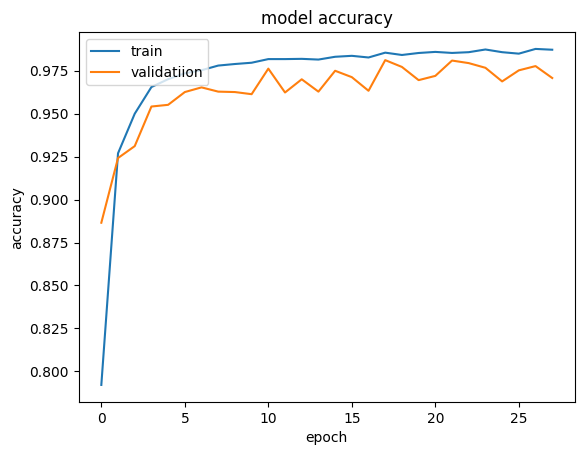

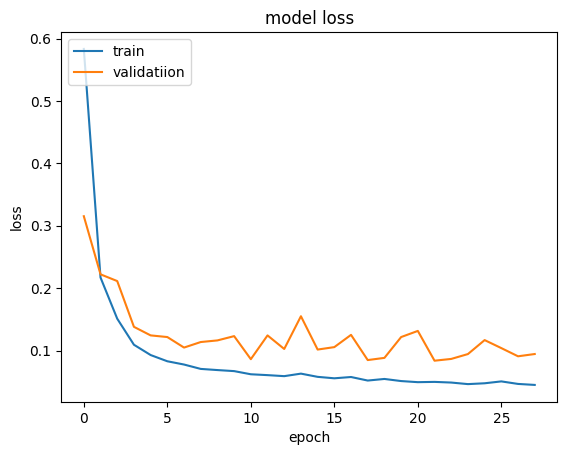

In [153]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validatiion'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validatiion'], loc='upper left')
plt.show()

In [154]:
#predicting on test datset
from keras.models import load_model
from sklearn.metrics import accuracy_score

# model = load_model(model_filepath)
classify_x=model.predict(X_test) 
# print(classify_x)
classes_x=np.argmax(classify_x,axis=1)
y_test= np.argmax(y_test,axis=1)
print(classes_x)
accuracy=accuracy_score(y_test, classes_x)
accuracy

316/316 [==============================] - 1s 3ms/step
[1 1 1 ... 4 4 4]


0.8374628344895937

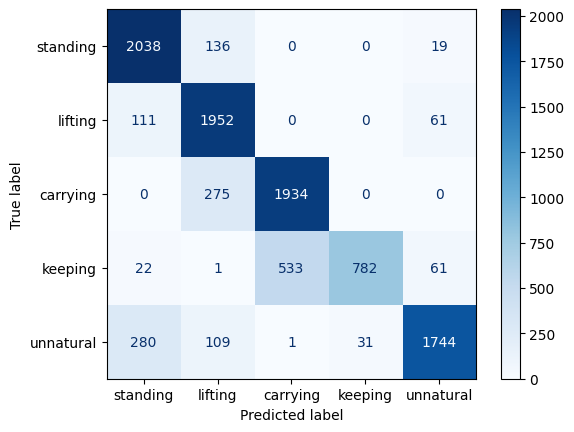

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      2193
           1       0.79      0.92      0.85      2124
           2       0.78      0.88      0.83      2209
           3       0.96      0.56      0.71      1399
           4       0.93      0.81      0.86      2165

    accuracy                           0.84     10090
   macro avg       0.86      0.82      0.82     10090
weighted avg       0.85      0.84      0.83     10090



In [155]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

labels = ["standing", "lifting", "carrying", "keeping", "unnatural"]

cm = confusion_matrix(y_test, classes_x)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, classes_x))

In [156]:
# model_filepath=f'/home/RUS_CIP/st179677/project/model/{round(accuracy*100,2)}_lstm_model.keras'

# model.save(model_filepath)